# **PRÁCTICA 4:  Machine Learning - Parte 2: Hackathon**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 3ª curso del Grado Ciencia de Datos


En esta parte de la práctica vamos a poner en práctica todo lo que hemos aprendido hasta la fecha.
Vamos a competir por ver quien obtiene el menor MSE y mejor accuracy de predicción para unos datos dados. El problema puede ser tomado como regresión o clasificación.
Los datos han salido de aquí:
    https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD
        
Leereis los datos que ya están preparados en la carpeta de la práctica y utilizareis los de "train" para entrenar el modelo y luego aplicareis el modelo en los de test. Observad que solo teneis los datos de entrada (X) de test, nos enviareis vuestras predicciones y nosotros las compararemos con las de test.

Recuerda utilizar todo lo que has aprendido:
- Preprocesado

- Extracción de características
Básico, mirar el PCA , probar los diferentes número de dimensiones para el PCA
mirar librerías del skilearn!!!!!!!!!!!!!!!!!!!!!!!!
- Tipos de entrenamiento

- Algoritmo de predicción SVM o SVR

PROBLEMAS QUE VAMOS A TENER

-muchas dimensiones (Pca podemos reducir dim pero eliminando info, tenemos que encontrar un punto de equilibrio de las dimensiones que nos quedamos y las dimensiones que nos quitamos)

-tenemos demasiados datos (WARD, kFOLDm distintas particiones de los datos, los datos de entrenamiento lo vamos a tener que partir porque no vamos a entrenar con todos los datos de entrenamiento no solo porque no sean lo suficientemente grandes si no porque no shacen falta datos de muestra para despues testear de validación (estos datos de validación los tenemos que guardar))

A continuación tienes un ejemplo muy simple de ejercicio.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
import scipy

In [ ]:
# Carpeta donde tienes los datos
#data_folder = "./datos_year_predict/"
# Leemos
Xtrain = pd.read_csv("X_train.csv.gz") 
ytrain = pd.read_csv("y_train.csv.gz") 
Xtest = pd.read_csv("X_test.csv.gz")
# Convertimos de dataframe a arrays numpy
Xtrain = Xtrain.values[:, 1:]
ytrain = ytrain.values[:, 1:]
Xtest = Xtest.values[:, 1:]

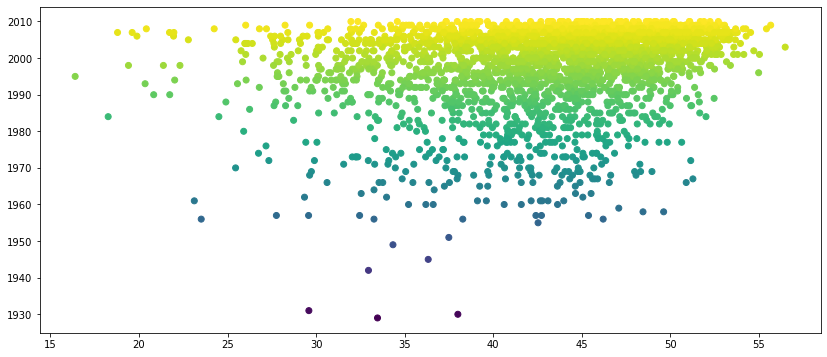

In [ ]:
# Representamos las primeras dimensiones de X contra y
# Tomamos algunas muestras al azar para hacer las pruebas más rápidamente
nss = 3000
subset = np.random.permutation(Xtrain.shape[0])[:nss]

# 2D

fig = plt.figure(figsize=(14,6))
plt.scatter(Xtrain[subset, 0], ytrain[subset], c=ytrain[subset]);


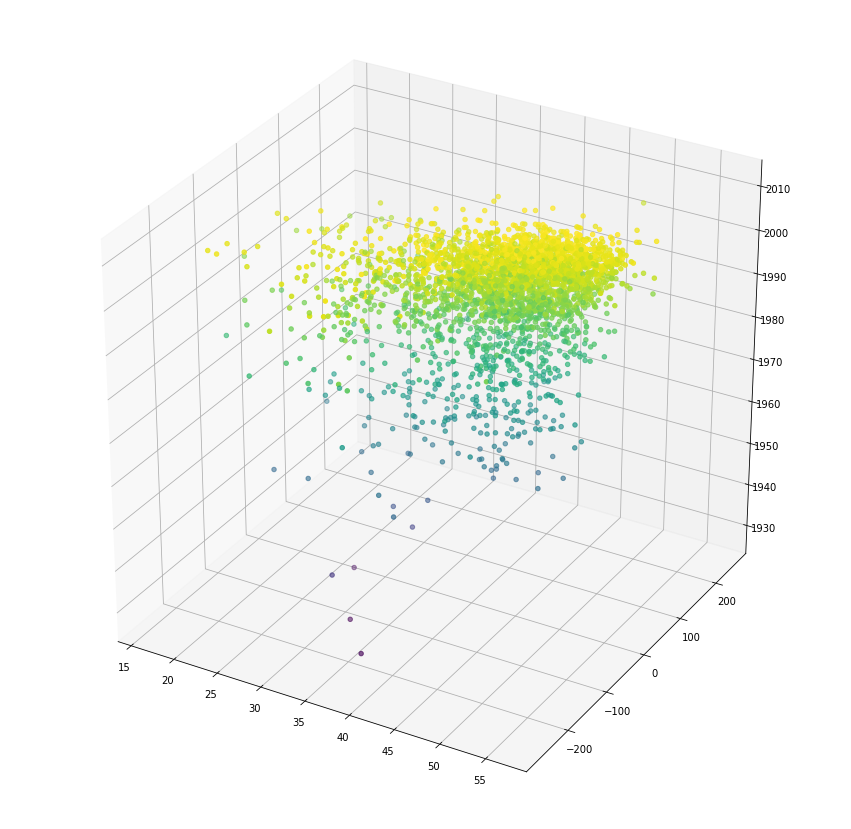

In [ ]:
# 3D

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
c_aux = ytrain[subset,0]/np.max(ytrain[subset,0])
ax.scatter(Xtrain[subset, 0], Xtrain[subset, 1], ytrain[subset],c=c_aux)#, c=ytrain[subset]);


# Entrenamos un modelo de ejemplo

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


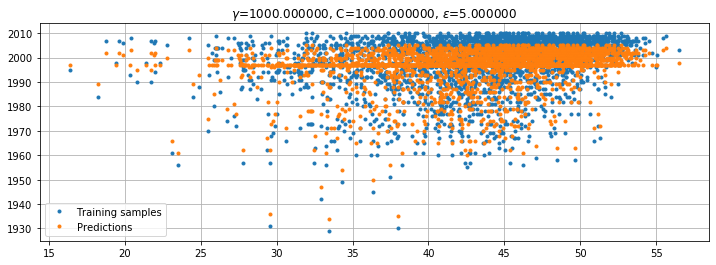

In [ ]:
# Vamos a entrenar un modelo de ejemplo con parámetros a mano y con solo 1000 datos
# Aquí tienes que aplicar todos los conocimientos adquiridos para encontra el mejor modelo
C = 1000
epsilon = 5
gamma = 1000

svr = SVR(kernel='rbf', gamma=gamma, C=C, epsilon=epsilon)
svr.fit(Xtrain[subset,:], ytrain[subset])

y_hat = svr.predict(Xtrain[subset,:])
# redondeamos para que de valores de años enteros
y_hat = np.round(y_hat)

plt.figure(figsize=(12,4))
plt.plot(Xtrain[subset, 0], ytrain[subset], '.', label='Training samples')
plt.plot(Xtrain[subset, 0], y_hat, '.', label='Predictions')
plt.title('$\gamma$=%f' % gamma + ', C=%f' % C + ', $\epsilon$=%f' % epsilon)
plt.legend(), plt.grid(1);

# Predecimos en test

In [ ]:
y_hat = svr.predict(Xtest) # Hacemos predicci´pon 
# redondeamos para que de valores de años enteros
y_hat = np.round(y_hat) #hACEMOS REDONDEO, porque los datos de prediccicón son años y es un nñumero discreto.
#Regresión 
#Clasificación
#svr

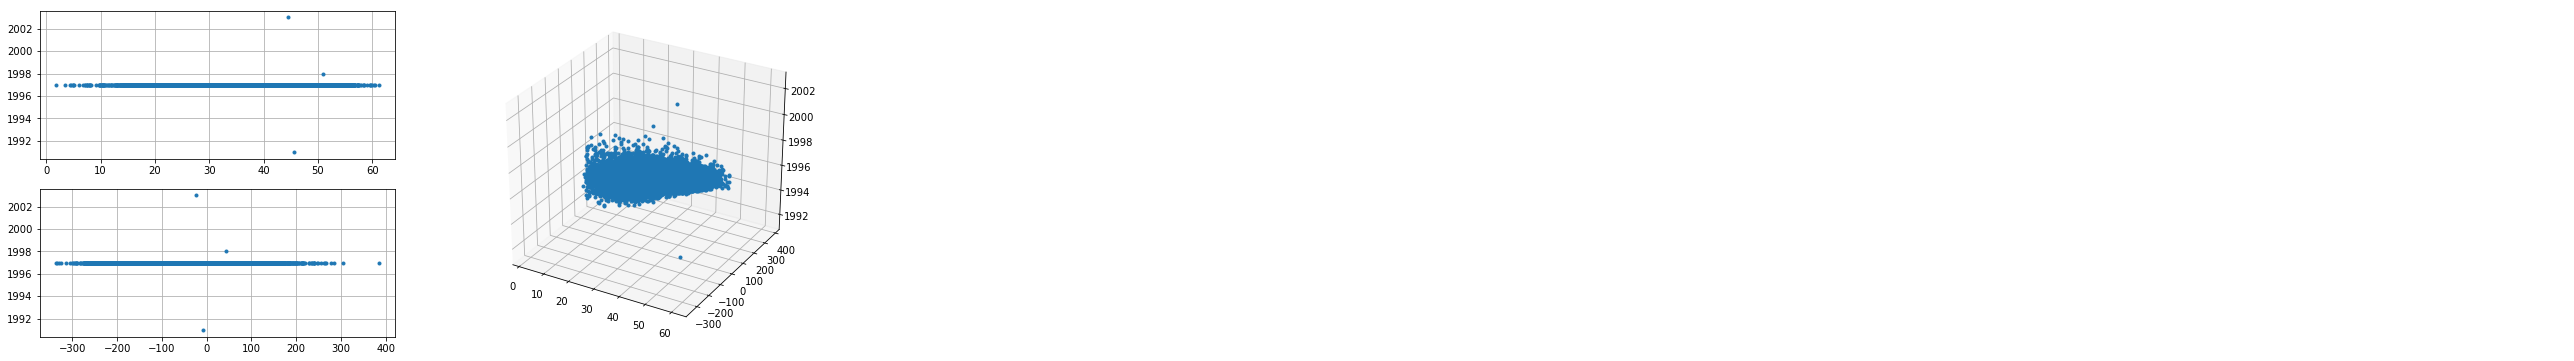

In [ ]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(221)
ax.plot(Xtest[:, 0], y_hat, '.', label='Test predictions coord. 0'), ax.grid(1);
ax = fig.add_subplot(223)
ax.plot(Xtest[:, 1], y_hat, '.', label='Test predictions coord. 1'), ax.grid(1);
ax = fig.add_subplot(122, projection='3d')
ax.plot(Xtest[:, 0], Xtest[:, 1], y_hat, '.');

# Guardamos las predicciones
Esto es lo que teneis que entregar

In [ ]:
#Pasamos a DaraFrame
y_hat = pd.DataFrame(y_hat)
#Guardamos .csv (lo que hay que subir)
y_hat.to_csv('y_hat.csv')